In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from   matplotlib import pyplot as plt
from   scipy.integrate import odeint as ode
%matplotlib inline

In [3]:
def TwoBody(state,t,params):
    #unpack the state
    x     = state[0]
    y     = state[1]
    z     = state[2]
    vx    = state[3]
    vy    = state[4]
    vz    = state[5]
    
    #unpack params
    alpha = params['alpha']
    
    #define helpers
    r     = sp.sqrt(x**2 + y**2 + z**2)
    q     = alpha/r**3
    
    #state derive
    ds = [vx, vy, vz, -q*x, -q*y, -q*z]
    return ds

In [4]:
def conserved_quantities(soln,params):
    pos     = soln[:,0:3]
    vel     = soln[:,3:6]
    r       = np.sqrt((pos*pos).sum(axis=1)).reshape(-1,1) #makes the broadcast shape correct???
    E       = 0.5*(vel*vel).sum(axis=1).reshape(-1,1) - params['alpha']/r #other reshape needed to avoid a NxN shape for E???
    L       = np.cross(pos,vel)
    Ecc     = np.cross(vel,L)/params['alpha'] -  pos/r
    return E, L, Ecc    

In [5]:
def scattering_angle(soln):
    vi     = soln[0,3:6]
    vf     = soln[max(soln.shape)-1,3:6]
    vi_mag = sp.sqrt( vi[0]**2 + vi[1]**2 + vi[2]**2 )
    vf_mag = sp.sqrt( vf[0]**2 + vf[1]**2 + vi[2]**2 )
    vdot   = vi[0]*vf[0] + vi[1]*vf[1] + vi[2]*vf[2]
    theta = sp.arccos(vdot/vi_mag/vf_mag)
    return theta

In [6]:
def scan_impact_param(b_range,s0,params):
    theta              = b_range[:]*0.0
    counter            = 0
    for b in b_range:
        timespan       = np.arange(0,60*200,30)
        s0[1]          = b
        soln           = ode(TwoBody,s0,timespan,args=(params,),rtol=1e-8,atol=1e-10)
        theta[counter] = scattering_angle(soln)
        counter        = counter + 1
    return theta

In [7]:
b_range     = np.arange(1,20,0.5)
S_init      = [-2000,0,0,1,0,0]
params      = {'alpha':1.0}
theta_range = scan_impact_param(b_range,S_init,params)

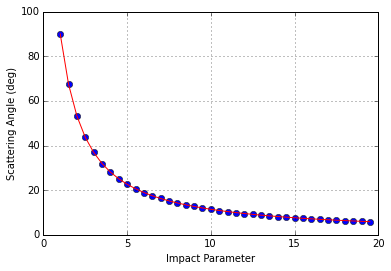

In [8]:
E        = 1.0/2.0*(S_init[3]**2 + S_init[4]**2 + S_init[5]**2) - params['alpha']/sp.sqrt(S_init[0]**2 + S_init[1]**2 + S_init[2]**2)
deg      = 180/sp.pi
t_theory = 2.0*sp.arctan(1.0/(2.0*E*b_range))
plt.plot(b_range,theta_range*deg,'bo',b_range,t_theory*deg,'r-')
plt.grid(True)
plt.xlabel('Impact Parameter')
plt.ylabel('Scattering Angle (deg)')
plt.show()

In [9]:
timespan       = np.arange(0,20,0.001)
b              = 0.1
x0             = 30
s0             = [-1.0*x0,b,0,2.25,0,0]
params         = {'alpha':-0.4}
soln           = ode(TwoBody,s0,timespan,args=(params,),rtol=1e-8,atol=1e-10)
Energy, L, Ecc = conserved_quantities(soln,params)
ex             = -Ecc[0,0]
ey             = -Ecc[0,1]
r              = sp.sqrt( (soln[:,0:3]*soln[:,0:3]).sum(axis=1) )

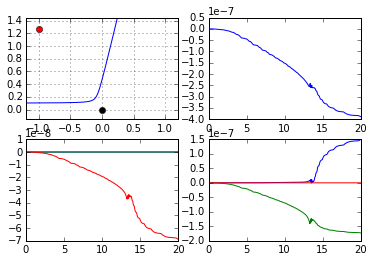

In [10]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(soln[:,0],soln[:,1],'b-',0,0,'ko',ex,ey,'ro')
ax1.grid(True)
ax1.axis('equal')
ax1.axis([-1.2, 1.2, -0.1, 1.4])
ax2.plot(timespan,Energy-Energy[0])
ax3.plot(timespan,L[:,0]-L[0,0],timespan,L[:,1]-L[0,1],timespan,L[:,2]-L[0,2])
ax4.plot(timespan,Ecc[:,0]-Ecc[0,0],timespan,Ecc[:,1]-Ecc[0,1],timespan,Ecc[:,2]-Ecc[0,2])

13.478

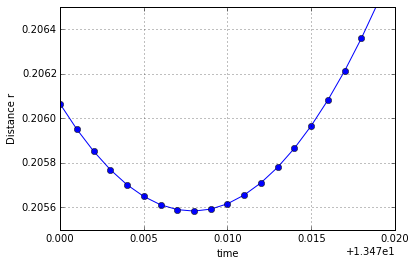

In [11]:
plt.plot(timespan,r,'bo-')
plt.xlabel('time')
plt.ylabel('Distance r')
plt.grid('on')
plt.axis([13.47,13.49,0.2055,0.2065])
r_min = min(r)
r_reg = [x for x in r]
r_reg.index(r_min)
timespan[r_reg.index(r_min)]

(-2.5, 0.5, 0.0, 1.4000000000000001)

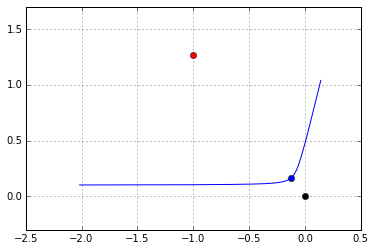

In [12]:
plt.plot(soln[12500:14000,0],soln[12500:14000,1],'b-',0,0,'ko',soln[13478,0],soln[13478,1],'bo',ex,ey,'ro')
plt.grid(True)
plt.axis('equal')

In [13]:
theta = scattering_angle(soln)

In [14]:
1.0/sp.sin(theta/2)

1.6156492692301969

In [15]:
print sp.sqrt( Ecc[0,0]**2 + Ecc[0,1]**2 + Ecc[0,2]**2 )

1.61562498549


In [16]:
L_mag = sp.sqrt(L[0,0]**2 + L[0,1]**2 + L[0,2]**2)
print L_mag**2/abs(params['alpha'])/( sp.sqrt(ex**2 + ey**2) - 1), r_min

0.20558376119 0.205583828807


In [17]:
timespan       = np.arange(0,20,0.001)
b              = 0.1
x0             = 30
s0             = [-1.0*x0,b,0,2.25,0,0]
params         = {'alpha':0.4}
soln           = ode(TwoBody,s0,timespan,args=(params,),rtol=1e-8,atol=1e-10)
Energy, L, Ecc = conserved_quantities(soln,params)
ex             = Ecc[0,0]
ey             = Ecc[0,1]
r              = sp.sqrt( (soln[:,0:3]*soln[:,0:3]).sum(axis=1) )

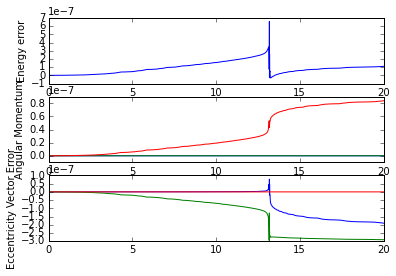

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
#ax1.plot(soln[:,0],soln[:,1],'b-',0,0,'ko',ex,ey,'ro')
#ax1.grid(True)
#ax1.axis('equal')
#ax1.axis([-1.2, 1.2, -0.1, 1.4])
#ax1.set_xlabel('x')
#ax1.set_ylabel('y')
ax1.plot(timespan,Energy-Energy[0])
ax1.set_ylabel('Energy error')
ax2.plot(timespan,L[:,0]-L[0,0],timespan,L[:,1]-L[0,1],timespan,L[:,2]-L[0,2])
ax2.set_ylabel('Angular Momentum')
ax3.plot(timespan,Ecc[:,0]-Ecc[0,0],timespan,Ecc[:,1]-Ecc[0,1],timespan,Ecc[:,2]-Ecc[0,2])
ax3.set_ylabel('Eccentricity Vector Error')


13.186 0.0484864754085


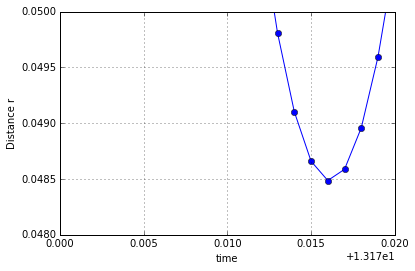

In [19]:
plt.plot(timespan,r,'bo-')
plt.xlabel('time')
plt.ylabel('Distance r')
plt.grid('on')
plt.axis([13.17,13.19,0.0480,0.050])
r_min = min(r)
r_reg = [x for x in r]
r_reg.index(r_min)
print timespan[r_reg.index(r_min)], r_min

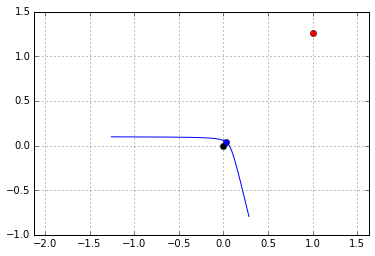

In [21]:
plt.plot(soln[12700:13500,0],soln[12700:13500,1],'b-',0,0,'ko',soln[13186,0],soln[13186,1],'bo',ex,ey,'ro')
plt.grid(True)
plt.axis('equal')
plt.savefig('sample.pdf')

In [ ]:
L_mag = sp.sqrt(L[0,0]**2 + L[0,1]**2 + L[0,2]**2)
print L_mag**2/abs(params['alpha'])/( sp.sqrt(ex**2 + ey**2) + 1), r_min

In [ ]:
theta = scattering_angle(soln)

In [ ]:
1.0/sp.sin(theta/2)

In [ ]:
print sp.sqrt( Ecc[0,0]**2 + Ecc[0,1]**2 + Ecc[0,2]**2 )